In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x,y = np.loadtxt('Expt4.csv',usecols=(0,1),dtype='f',delimiter =',',skiprows = 1,unpack=True)
N = len(x)

In [3]:
#print(xi,yi)
xbar = np.average(x)
ybar = np.average(y)

In [4]:
D = 0
for xi in x:
    D += (xi - xbar)*(xi - xbar)

In [5]:
m = 0
for i in range(N):
    m += (x[i] - xbar)*y[i]
m = m/D
print(m)

0.006882210082998234


In [6]:
c = ybar - m*xbar

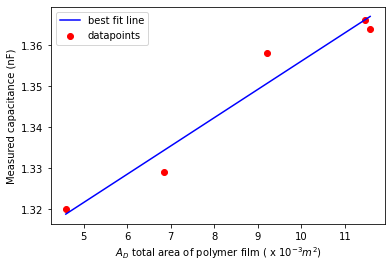

In [7]:
plt.scatter(x,y,color='red',label='datapoints')
plt.plot([np.amin(x),np.amax(x)],[m*np.amin(x)+c,m*np.amax(x)+c],color='blue',label='best fit line')
plt.xlabel('$A_D$ total area of polymer film $($ x $10^{-3} m^2)$')
plt.ylabel('Measured capacitance (nF)')
plt.legend()

In [8]:
d = y - m*x - c

In [9]:
postfactor_error = 0
for i in range(N):
    postfactor_error += d[i]*d[i]/(N-2)
Delta_m = np.sqrt(postfactor_error/D)
Delta_c = np.sqrt(postfactor_error*(1/N + xbar*xbar/D/N))
print(m,c,Delta_m/m, Delta_c/c)

0.006882210082998234 1.2872594577692174 0.13351467664024358 0.003392016019170861


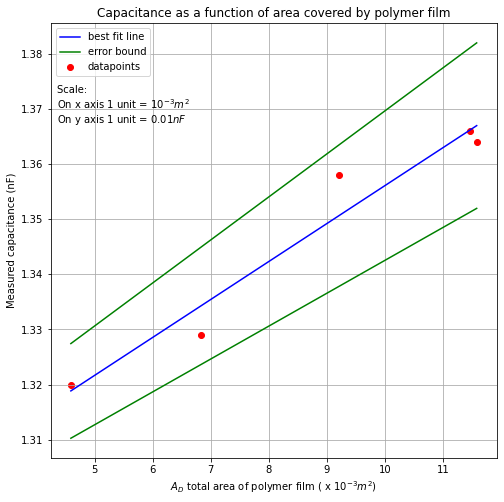

0.006882210082998234 1.2872594577692174 0.0009188760538017331 0.0043664047015823815


In [10]:
plt.scatter(x,y,color='red',label='datapoints')
plt.plot([np.amin(x),np.amax(x)],[m*np.amin(x)+c,m*np.amax(x)+c],color='blue',label='best fit line')
mplus = m+Delta_m
mminus = m - Delta_m
cplus = c + Delta_c
cminus = c - Delta_c
plt.plot([np.amin(x),np.amax(x)],[mplus*np.amin(x)+cplus,mplus*np.amax(x)+cplus],color='green',label='error bound')
plt.plot([np.amin(x),np.amax(x)],[mminus*np.amin(x)+cminus,mminus*np.amax(x)+cminus],color='green')
plt.xlabel('$A_D$ total area of polymer film $($ x $10^{-3} m^2)$')
plt.ylabel('Measured capacitance (nF)')
plt.legend()
plt.gcf().set_size_inches(8,8)
plt.grid(b=True, which='major', color='#AAAAAA', linestyle='-')
plt.text(4.35,1.3675,'Scale: \nOn x axis 1 unit = $10^{-3}m^2$ \nOn y axis 1 unit = $0.01 nF$ ')
plt.title('Capacitance as a function of area covered by polymer film')
plt.savefig('Final_plot')
plt.show()
print(m,c,Delta_m,Delta_c)

In [11]:
AT = 14.2876382 #x 10^-3 m^2
k = 1+m*AT/c
Delta_k = k*(Delta_m/m + Delta_c/c) 
print(k, Delta_k)

1.076387496777592 0.14736465220376624
